In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:\\Users\\syedm\\OneDrive\\ChurnBuster — Predictive Churn Scoring + Targeted Retention Engine\\churnbuster\\data\\raw\\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
# 1. Overview Statistics
print("Data Head:")
print(df.head())
print("\nData Info:")
df.info()
print("\nDescriptive Statistics:")
print(df.describe())

Data Head:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Co

In [5]:
# 2. Missingness
print("\nMissing Values:")
print(df.isnull().sum())
# Handle 'TotalCharges' being an object type and having missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)



Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64



Overall Churn Rate:
Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64


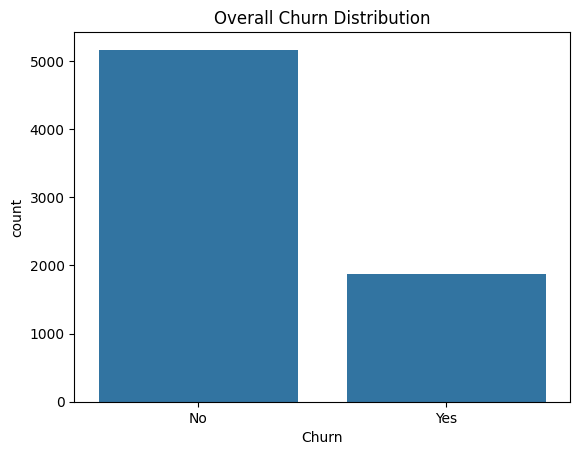

In [6]:
# 3. Churn Rate
churn_rate = df['Churn'].value_counts(normalize=True)
print(f"\nOverall Churn Rate:\n{churn_rate}")
sns.countplot(x='Churn', data=df)
plt.title('Overall Churn Distribution')
plt.show()

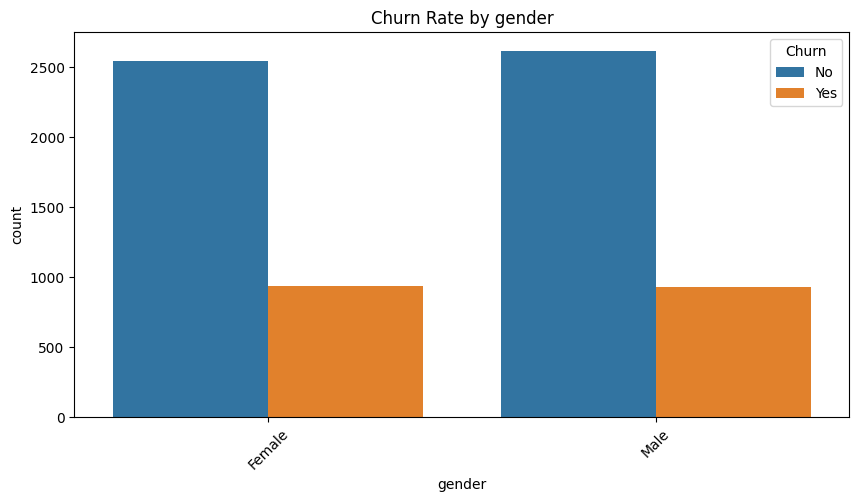

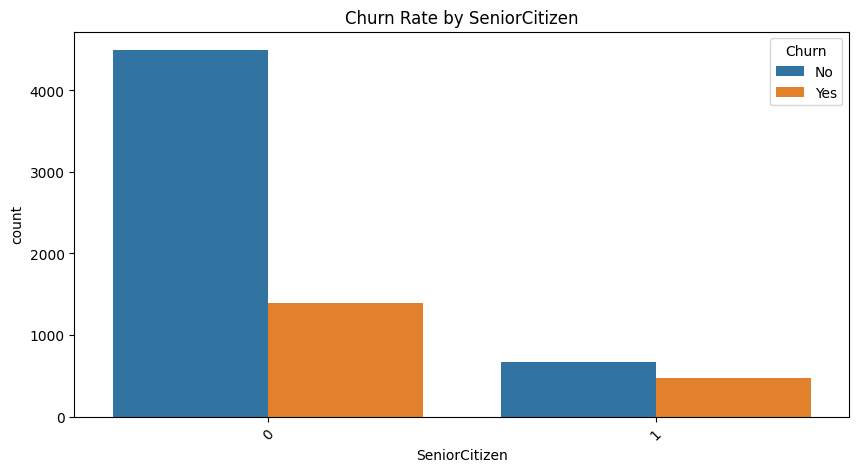

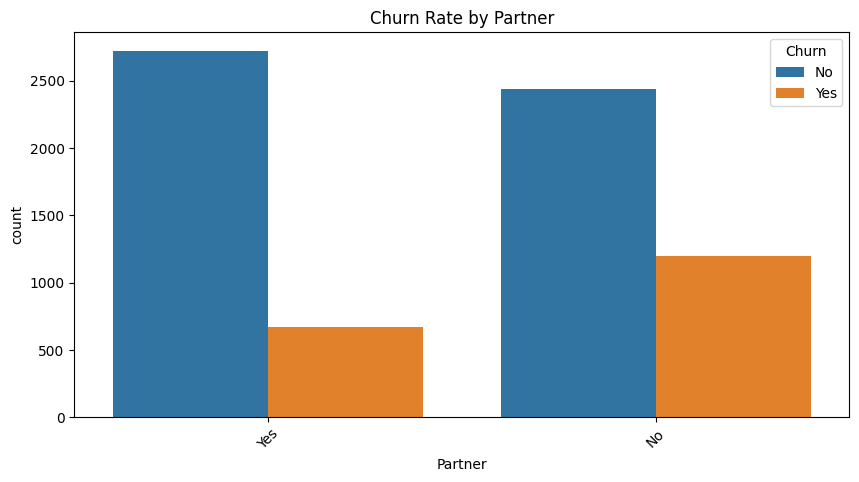

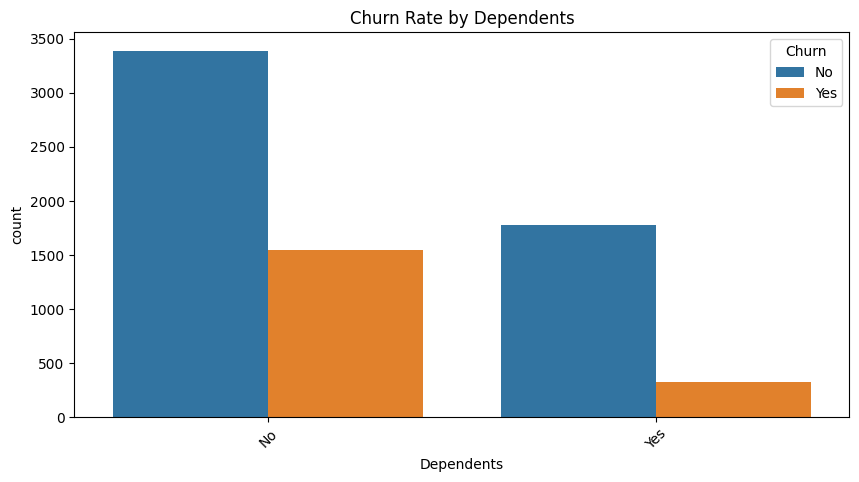

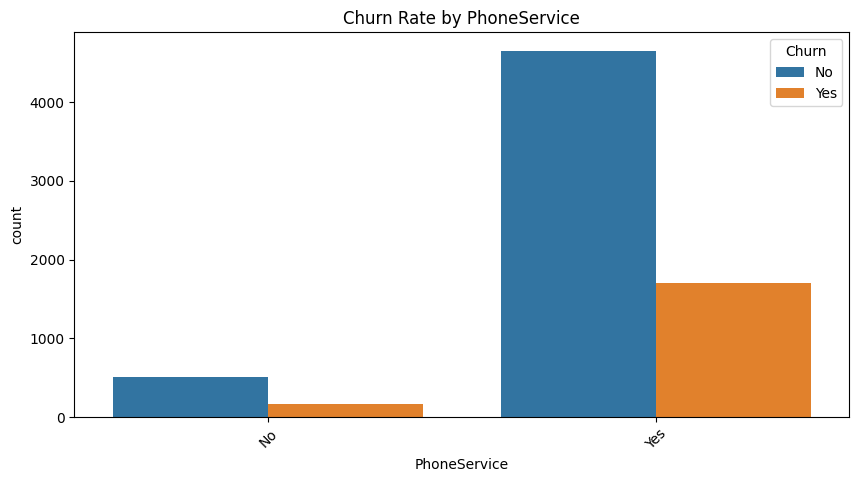

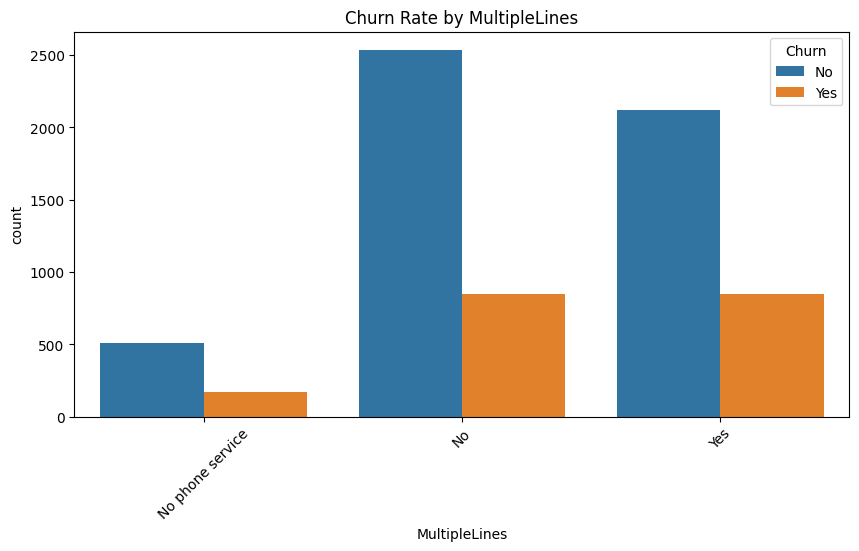

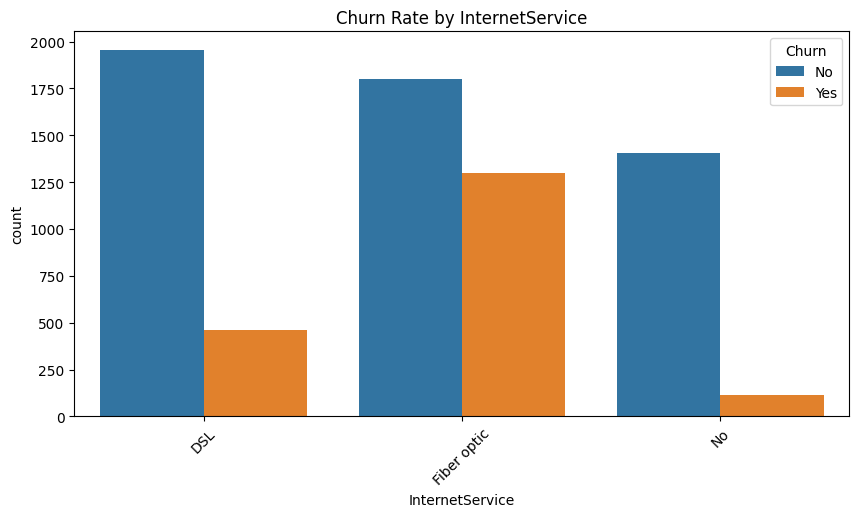

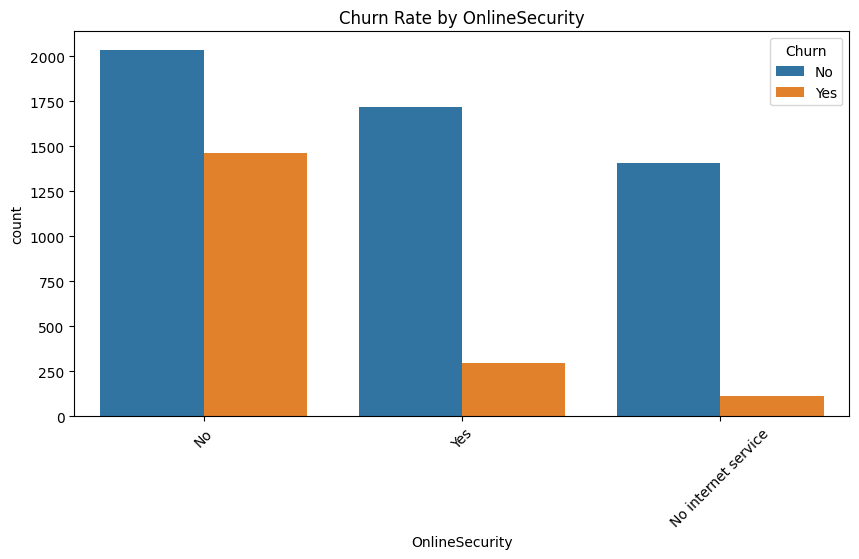

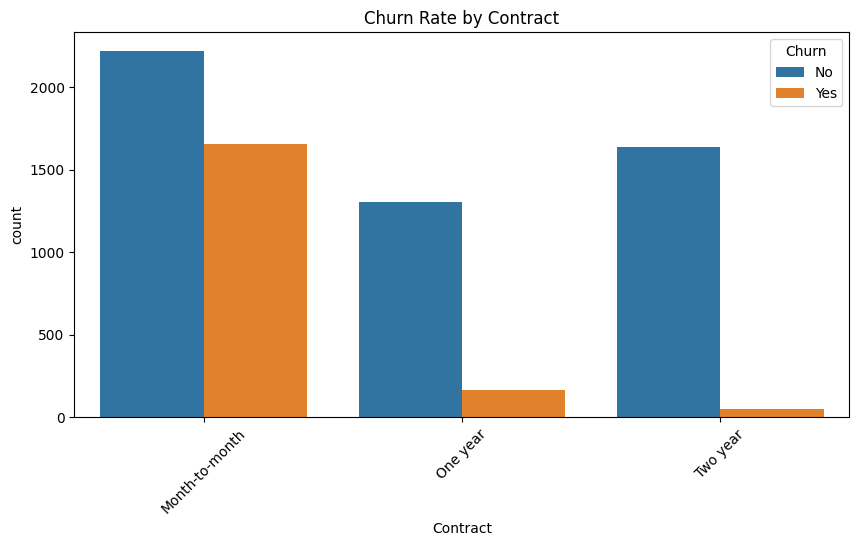

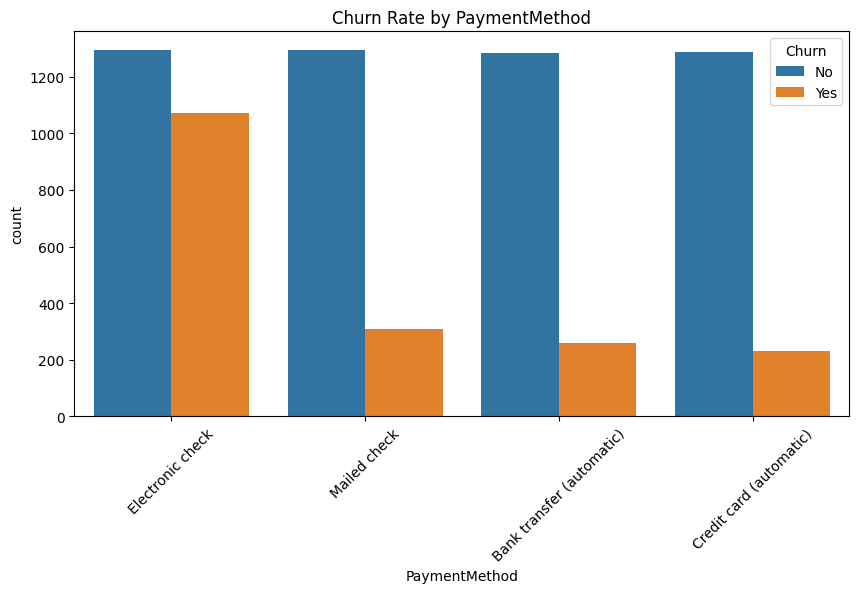

In [7]:
# 4. Churn by Categorical Variables
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'Contract', 'PaymentMethod']
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'Churn Rate by {feature}')
    plt.xticks(rotation=45)
    plt.show()

In [8]:
# Which segments have the highest churn?
# Example: Churn by contract type
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
print(f"\nChurn Rate by Contract Type:\n{contract_churn}")


Churn Rate by Contract Type:
Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887228  0.112772
Two year        0.971513  0.028487


In [9]:
# --- Business Insight Example ---
# "Customers with tenure < 3 months and >2 support tickets in last 30 days have 3× higher churn.”
# (Note: Support ticket data is not in this dataset, this is an example of an insight you'd generate with more complete data)
tenure_churn = df.groupby(pd.cut(df['tenure'], bins=[0, 3, 12, 24, 72]))['Churn'].value_counts(normalize=True).unstack()
print(f"\nChurn Rate by Tenure:\n{tenure_churn}")
print("\nInsight: Customers with tenure less than 3 months have a significantly higher churn rate.")


Churn Rate by Tenure:
Churn           No       Yes
tenure                      
(0, 3]    0.431970  0.568030
(3, 12]   0.608541  0.391459
(12, 24]  0.712891  0.287109
(24, 72]  0.859640  0.140360

Insight: Customers with tenure less than 3 months have a significantly higher churn rate.


C:\Users\syedm\AppData\Local\Temp\ipykernel_10616\3893519675.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby(pd.cut(df['tenure'], bins=[0, 3, 12, 24, 72]))['Churn'].value_counts(normalize=True).unstack()
